## Data collection from Kaggle

In [1]:
import os
import shutil
import zipfile
from tensorflow.keras import image

ModuleNotFoundError: No module named 'tensorflow'

In [11]:
!kaggle datasets list

ref                                                         title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                       Data Science Salaries 2023  💸                 25KB  2023-04-13 09:55:16           6111        152  1.0              
salvatorerastelli/spotify-and-youtube                       Spotify and Youtube                            9MB  2023-03-20 15:43:25          11599        405  1.0              
iammustafatz/diabetes-prediction-dataset                    Diabetes prediction dataset                  734KB  2023-04-08 06:11:45           3145         56  1.0              
shawkyelgendy/furniture-price-prediction                    Furniture Price Prediction                    81KB  202

In [12]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset


  0%|          | 0.00/330M [00:00<?, ?B/s]
  0%|          | 1.00M/330M [00:00<00:52, 6.60MB/s]
  1%|          | 2.00M/330M [00:00<00:46, 7.38MB/s]
  1%|          | 3.00M/330M [00:00<00:43, 7.83MB/s]
  1%|          | 4.00M/330M [00:00<00:41, 8.16MB/s]
  2%|▏         | 5.00M/330M [00:00<00:39, 8.60MB/s]
  2%|▏         | 6.00M/330M [00:00<00:37, 8.97MB/s]
  2%|▏         | 7.00M/330M [00:00<00:37, 9.12MB/s]
  2%|▏         | 8.00M/330M [00:00<00:35, 9.43MB/s]
  3%|▎         | 10.0M/330M [00:01<00:42, 7.90MB/s]
  4%|▎         | 12.0M/330M [00:01<00:55, 6.02MB/s]
  4%|▍         | 14.0M/330M [00:02<00:55, 6.02MB/s]
  5%|▍         | 15.0M/330M [00:02<00:50, 6.60MB/s]
  5%|▍         | 16.0M/330M [00:02<00:46, 7.16MB/s]
  5%|▌         | 17.0M/330M [00:02<00:43, 7.61MB/s]
  5%|▌         | 18.0M/330M [00:02<00:40, 8.11MB/s]
  6%|▌         | 19.0M/330M [00:02<00:38, 8.45MB/s]
  6%|▌         | 20.0M/330M [00:02<00:48, 6.77MB/s]
  6%|▋         | 21.0M/330M [00:02<00:43, 7.46MB/s]
  7%|▋         | 22.

##Preprocessing the Data

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
INPUT_SIZE = [128,128]
BATCH = 3

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range = 0.2,
                                      )

training_data = training_datagen.flow_from_directory('/content/Face Mask Dataset/Train',
                                                     target_size = INPUT_SIZE,
                                                     batch_size=BATCH,
                                                     class_mode = 'binary'
                                                    )

Found 10000 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = training_datagen.flow_from_directory('/content/Face Mask Dataset/Test',
                                                     target_size = INPUT_SIZE,
                                                     batch_size=BATCH,
                                                     class_mode = 'binary'
                                                     )

Found 992 images belonging to 2 classes.


## Importing VGG16

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
vgg16 = VGG16(input_shape=INPUT_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
flatten = Flatten()(vgg16.output)
dense_1 = Dense(units=500, activation='relu')(flatten)
dense_2 = Dense(units=500, activation='relu')(dense_1)
dense_3 = Dense(units=100, activation='relu')(dense_2)
dense_4 = Dense(units=100, activation='relu')(dense_3)
dense_output = Dense(units=1, activation='sigmoid')(dense_4)

In [ ]:
model = Model(inputs=vgg16.input, outputs=dense_output)

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [33]:
r = model.fit_generator(
  training_data,
  validation_data=test_data,
  epochs=5, #To be Run on 60 epochs for maximum efficiency 
  steps_per_epoch=len(training_data),
  validation_steps=len(test_data)
)

Epoch 1/5
   4/3334 [..............................] - ETA: 1:14 - loss: 3.7243e-10 - accuracy: 1.0000

<ipython-input-33-a09db9ab8e95>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


3334/3334 [==============================] - 83s 25ms/step - loss: 0.0092 - accuracy: 0.9989 - val_loss: 0.1271 - val_accuracy: 0.9869
Epoch 2/5
3334/3334 [==============================] - 76s 23ms/step - loss: 0.0093 - accuracy: 0.9984 - val_loss: 0.0284 - val_accuracy: 0.9980
Epoch 3/5
3334/3334 [==============================] - 82s 24ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.1936 - val_accuracy: 0.9929
Epoch 4/5
3334/3334 [==============================] - 76s 23ms/step - loss: 0.0059 - accuracy: 0.9989 - val_loss: 0.0421 - val_accuracy: 0.9960
Epoch 5/5
3334/3334 [==============================] - 78s 23ms/step - loss: 0.0103 - accuracy: 0.9980 - val_loss: 0.0656 - val_accuracy: 0.9970


## Visualization

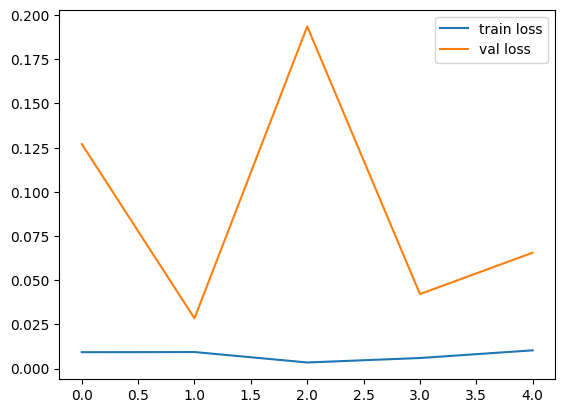

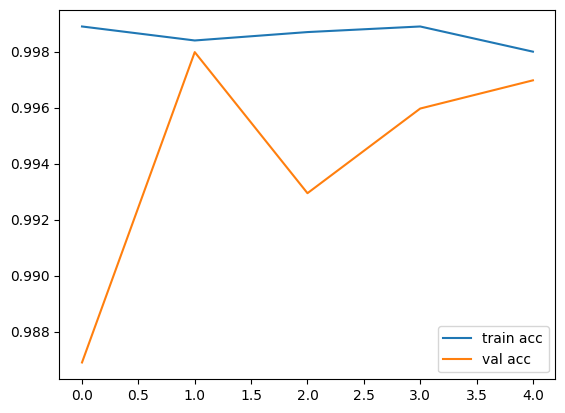

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Validating the Model

1/1 [==============================] - 0s 28ms/step


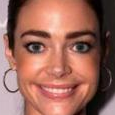

The Person above has no mask
1/1 [==============================] - 0s 27ms/step


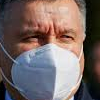

The person above has a mask


In [52]:
import numpy as np
from IPython.display import Image
from tensorflow.keras.preprocessing import image

images = ['/content/Face Mask Dataset/Validation/WithoutMask/1348.png',          
          '/content/Face Mask Dataset/Validation/WithMask/1002.png']

for image_path in images:
    test_image = image.load_img(image_path, target_size=INPUT_SIZE)
    test_image = image.img_to_array(test_image) / 255
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)[0][0]
    display(Image(image_path))
    if result < 0.5:
        print('The person above has a mask')
    else:
        print('The Person above has no mask')

In [ ]:
model.save('face_mask_vgg16.h5')
files.download('face_mask_vgg16.h5')

In [ ]:
sample_image_1 = cv2.imread()
sample_image_1 = cv2.resize(sample_image_1, (224,224))

In [1]:
def face_mask_detection(img):
  y_pred = model.predict_classes(1,224,224,3)
  return y_pred

In [ ]:
face_mask_detection(sample_image_1)

In [3]:
import cv2

cap = cv2.VideoCapture(0)

# Check if the video capture device is open
if not cap.isOpened():
    print("Could not open video capture device")
    exit()

# Set a delay between frames
delay = 10

# Try a different resolution
width = 640
height = 480
cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)

while True:
    # Capture a frame
    ret, frame = cap.read()

    #Calling the prediction
    img = cv2.resize(frame, (224,224))

    y_pred = face_mask_detection(frame)

    print(y_pred)
    # Check if the frame was captured successfully
    if not ret:
        print("Failed to capture frame")
        break

    # Show the frame
    cv2.imshow("window", frame)

    # Wait for a key press
    key = cv2.waitKey(delay)

    # Check if the 'x' key was pressed
    if key == ord('x'):
        break

# Release the video capture device and close the window
cap.release()
cv2.destroyAllWindows()


Could not open video capture device
Failed to capture frame


In [ ]:
#TODO --> Importing pickle for Streamlit application
import pickle